In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('casestudy.csv')

In [38]:
df_year2015 = df[df['year']==2015]
df_year2016 = df[df['year']==2016]
df_year2017 = df[df['year']==2017]

In [39]:
df_year2017

,ID,customer_email,net_revenue,year
435940,435940,mwrossuukz@gmail.com,96.61,2017
435941,435941,qvjfterwnk@gmail.com,176.00,2017
435942,435942,vlyigtgfzs@gmail.com,73.47,2017
435943,435943,yfirychuhk@gmail.com,138.17,2017
435944,435944,fdkiioqtli@gmail.com,156.87,2017
...,...,...,...,...
685922,685922,qzqttwiftu@gmail.com,184.58,2017
685923,685923,pjodiifjop@gmail.com,133.03,2017
685924,685924,appaplmgko@gmail.com,200.98,2017
685925,685925,wvkpmwsgck@gmail.com,235.35,2017


In [40]:
Revenue2015 = df_year2015['net_revenue'].sum()
Revenue2016 = df_year2016['net_revenue'].sum()
Revenue2017 = df_year2017['net_revenue'].sum()

In [41]:
print("Revenue in 2015:", Revenue2015)
print("Revenue in 2016:", Revenue2016)
print("Revenue in 2017:", Revenue2017)

Revenue in 2015: 29036749.189999994
Revenue in 2016: 25730943.59
Revenue in 2017: 31417495.030000016


In [42]:
df_new2016 = pd.merge(df_year2015, df_year2016, on='customer_email', how='outer',indicator=True)
df_new2016 = df_new2016[df_new2016['year_y']==2016]
df_new2016 = df_new2016[df_new2016['year_x'].isna()]
NewCustomer_Revenue_2016 = df_new2016['net_revenue_y'].sum()

In [43]:
print("Revenue of New Customers in 2016:",NewCustomer_Revenue_2016)

Revenue of New Customers in 2016: 18245491.01


In [44]:
df_new2017 = pd.merge(df_year2016, df_year2017, on='customer_email', how='outer',indicator=True)
df_new2017 = df_new2017[df_new2017['year_y']==2017]
df_new2017 = df_new2017[df_new2017['year_x'].isna()]
NewCustomer_Revenue_2017 = df_new2017['net_revenue_y'].sum()

In [45]:
print("Revenue of New Customers in 2017:",NewCustomer_Revenue_2017)

Revenue of New Customers in 2017: 28776235.039999995


In [46]:
df_new2017 = pd.merge(df_year2016, df_year2017, on='customer_email', how='outer',indicator=True)

In [47]:
df_new2017 = df_new2017[df_new2017['_merge']=='both']

In [48]:
df_existingdiff2017 = pd.DataFrame(columns=['customer_email','net_growth'])
df_existingdiff2017['net_growth'] = df_new2017['net_revenue_y'] - df_new2017['net_revenue_x']
df_existingdiff2017['customer_email'] = df_new2017['customer_email']

In [49]:
print("Exisiting customer growth in 2017", df_existingdiff2017)

Exisiting customer growth in 2017               customer_email  net_growth
7       yixtbjnxce@gmail.com      -67.46
13      gwqjyelgct@gmail.com      149.48
16      hxshgpdxtr@gmail.com      -39.25
28      gipqsrvngd@gmail.com       16.84
37      cdvwonzpwu@gmail.com      -37.97
...                      ...         ...
204622  flkeldljhv@gmail.com      -31.67
204628  ecrvkbfunu@gmail.com      -25.07
204631  tpdtoiokyt@gmail.com      237.03
204640  dcakqgznnm@gmail.com      -83.81
204643  fkweqlmmjw@gmail.com      -57.93

[20959 rows x 2 columns]


In [50]:
df_new2016 = pd.merge(df_year2015, df_year2016, on='customer_email', how='outer',indicator=True)
df_new2016 = df_new2016[df_new2016['_merge']=='both']


In [51]:
df_existingdiff2016 = pd.DataFrame(columns=['customer_email','net_growth'])
df_existingdiff2016['net_growth'] = df_new2016['net_revenue_y'] - df_new2016['net_revenue_x']
df_existingdiff2016['customer_email'] = df_new2016['customer_email']

In [52]:
print("Exisiting customer growth in 2016", df_existingdiff2016)

Exisiting customer growth in 2016                customer_email  net_growth
8        baiikostmd@gmail.com      -28.13
9        lfeafnigbu@gmail.com      -19.93
15       tqxsjlgjpi@gmail.com      -74.21
16       hxshgpdxtr@gmail.com       36.76
24       zvhsssvgor@gmail.com       22.29
...                       ...         ...
204631   tpdtoiokyt@gmail.com      -77.28
204633   yeserbsmyf@gmail.com       37.12
204636   nyunstvnpc@gmail.com       -6.41
204641   mezrjfkced@gmail.com       -4.02
204645   kxqglfdktu@gmail.com      -36.01

[59584 rows x 2 columns]


In [53]:
Revenue_attrition2017 = df_existingdiff2017['net_growth'].sum()
Revenue_attrition2016 = df_existingdiff2016['net_growth'].sum()

In [54]:
print("Revenue lost from attrition in 2017:", Revenue_attrition2017)
print("Revenue lost from attrition in 2016:", Revenue_attrition2016)

Revenue lost from attrition in 2017: 20611.340000000004
Revenue lost from attrition in 2016: 20335.459999999985


In [55]:
Ex_custrev_2017 = df_new2017['net_revenue_y'].sum()
Ex_custrev_2016 = df_new2017['net_revenue_x'].sum()

In [56]:
print("Revenue in 2017(Current Year):", Ex_custrev_2017)
print("Revenue in 2016(Previous Year):", Ex_custrev_2016)

Revenue in 2017(Current Year): 2641259.99
Revenue in 2016(Previous Year): 2620648.65


In [57]:
Ex_custrev_2016 = df_new2016['net_revenue_y'].sum()
Ex_custrev_2015 = df_new2016['net_revenue_x'].sum()

In [58]:
print("Revenue in 2016(Current Year):", Ex_custrev_2016)
print("Revenue in 2015(Previous Year):", Ex_custrev_2015)

Revenue in 2016(Current Year): 7485452.58
Revenue in 2015(Previous Year): 7465117.12


In [59]:
print("Total Customers in 2017:", len(df_year2017))
print("Total Customers in 2016:", len(df_year2016))
print("Total Customers in 2015:", len(df_year2015))

Total Customers in 2017: 249987
Total Customers in 2016: 204646
Total Customers in 2015: 231294


In [60]:
df_custlist2017 = pd.merge(df_year2016, df_year2017, on='customer_email', how='outer',indicator=True)
df_custlist2016 = pd.merge(df_year2015, df_year2016, on='customer_email', how='outer',indicator=True)

In [61]:
df_newcust2017 = df_custlist2017[df_custlist2017['_merge']=='right_only']
df_lostcust2017 = df_custlist2017[df_custlist2017['_merge']=='left_only']

In [62]:
print("New Customers in 2017", df_newcust2017['customer_email'])
print("Lost Customers in 2017",df_lostcust2017['customer_email'])

New Customers in 2017 204646     mwrossuukz@gmail.com
204647    qvjfterwnk@gmail.com 
204648     vlyigtgfzs@gmail.com
204649     yfirychuhk@gmail.com
204650     fdkiioqtli@gmail.com
                  ...          
433669     qzqttwiftu@gmail.com
433670     pjodiifjop@gmail.com
433671     appaplmgko@gmail.com
433672     wvkpmwsgck@gmail.com
433673     aregboumbw@gmail.com
Name: customer_email, Length: 229028, dtype: object
Lost Customers in 2017 0          mwrossuukz@gmail.com
1          gkwsoupawk@gmail.com
2          vlyigtgfzs@gmail.com
3          yfirychuhk@gmail.com
4          trnzgqinuu@gmail.com
                  ...          
204639     sqodpufunf@gmail.com
204641     mezrjfkced@gmail.com
204642     rdotspqdxi@gmail.com
204644     pidugzoeej@gmail.com
204645     kxqglfdktu@gmail.com
Name: customer_email, Length: 183687, dtype: object


In [63]:
df_newcust2016 = df_custlist2016[df_custlist2016['_merge']=='right_only']
df_lostcust2016 = df_custlist2016[df_custlist2016['_merge']=='left_only']

In [64]:
print("New Customers in 2016", df_newcust2016['customer_email'])
print("Lost Customers in 2016",df_lostcust2016['customer_email'])

New Customers in 2016 231294     mwrossuukz@gmail.com
231295     gkwsoupawk@gmail.com
231296     vlyigtgfzs@gmail.com
231297     yfirychuhk@gmail.com
231298     trnzgqinuu@gmail.com
                  ...          
376351     sqodpufunf@gmail.com
376352     dcakqgznnm@gmail.com
376353     rdotspqdxi@gmail.com
376354     fkweqlmmjw@gmail.com
376355     pidugzoeej@gmail.com
Name: customer_email, Length: 145062, dtype: object
Lost Customers in 2016 0          nhknapwsbx@gmail.com
1          joiuzbvcpn@gmail.com
2          ukkjctepxt@gmail.com
3          gykatilzrt@gmail.com
4          mmsgsrtxah@gmail.com
                  ...          
231289     xtrpmgjbwp@gmail.com
231290     peeorxpsbr@gmail.com
231291     vanasezjpw@gmail.com
231292     dnpremlztb@gmail.com
231293     qsgswrpycl@gmail.com
Name: customer_email, Length: 171710, dtype: object


In [88]:
Revenue = [Revenue2015,Revenue2016,Revenue2017]
RevenueYear = ['2015', '2016', '2017']

In [13]:
df_new2017

,ID_x,customer_email,net_revenue_x,year_x,ID_y,net_revenue_y,year_y,_merge
7,231301.0,yixtbjnxce@gmail.com,201.32,2016.0,435947.0,133.86,2017.0,both
13,231307.0,gwqjyelgct@gmail.com,14.62,2016.0,435953.0,164.10,2017.0,both
16,231310.0,hxshgpdxtr@gmail.com,217.35,2016.0,435956.0,178.10,2017.0,both
28,231322.0,gipqsrvngd@gmail.com,156.06,2016.0,435968.0,172.90,2017.0,both
37,231331.0,cdvwonzpwu@gmail.com,140.43,2016.0,435977.0,102.46,2017.0,both
...,...,...,...,...,...,...,...,...
204622,435916.0,flkeldljhv@gmail.com,211.68,2016.0,640562.0,180.01,2017.0,both
204628,435922.0,ecrvkbfunu@gmail.com,230.49,2016.0,640568.0,205.42,2017.0,both
204631,435925.0,tpdtoiokyt@gmail.com,5.60,2016.0,640571.0,242.63,2017.0,both
204640,435934.0,dcakqgznnm@gmail.com,146.47,2016.0,640580.0,62.66,2017.0,both


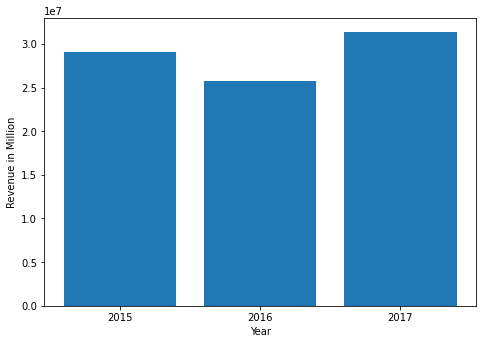

In [91]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(RevenueYear, Revenue)
ax.set_ylabel('Revenue in Million')
ax.set_xlabel('Year')
plt.show() 

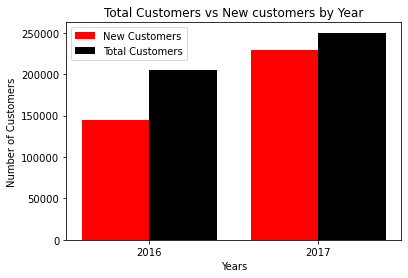

In [74]:
X = ['2016','2017']
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, (len(df_newcust2016), len(df_newcust2017)), 0.4, label = 'New Customers', color=['red'])
plt.bar(X_axis + 0.2, (len(df_year2016), len(df_year2017)), 0.4, label = 'Total Customers', color=['black'])
  
plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Number of Customers")
plt.title("Total Customers vs New customers by Year")
plt.legend()
plt.show()

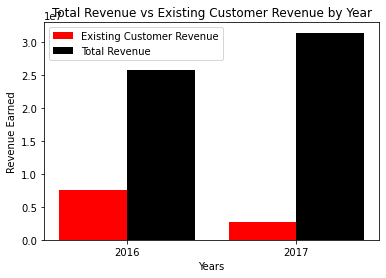

In [76]:
X = ['2016','2017']
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, (Ex_custrev_2016, Ex_custrev_2017), 0.4, label = 'Existing Customer Revenue', color=['red'])
plt.bar(X_axis + 0.2, (Revenue2016, Revenue2017), 0.4, label = 'Total Revenue', color=['black'])
  
plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Revenue Earned")
plt.title("Total Revenue vs Existing Customer Revenue by Year")
plt.legend()
plt.show()

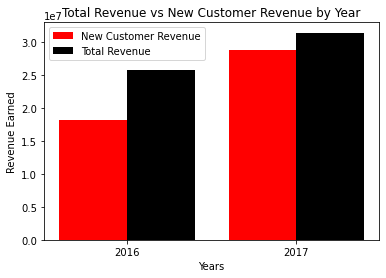

In [77]:
X = ['2016','2017']
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, (NewCustomer_Revenue_2016, NewCustomer_Revenue_2017), 0.4, label = 'New Customer Revenue', color=['red'])
plt.bar(X_axis + 0.2, (Revenue2016, Revenue2017), 0.4, label = 'Total Revenue', color=['black'])
  
plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Revenue Earned")
plt.title("Total Revenue vs New Customer Revenue by Year")
plt.legend()
plt.show()